# Elastix

This notebooks show very basic image registration examples with on-the-fly generated binary images.

In [1]:
from itk import itkElastixRegistrationMethodPython
from itk import itkTransformixFilterPython
import itk
import numpy as np
import matplotlib.pyplot as plt

## Image generators

In [10]:
def image_generator(x1, x2, y1, y2, z1, z2):
    image = np.zeros([100, 100, 100], np.float32)
    image[y1:y2, x1:x2, z1:z2] = 1
    image = itk.image_view_from_array(image)
    return image

## Rigid Test

In [11]:
# Create rigid transformed test images
fixed_image = image_generator(25,75,25,75,25,75)
moving_image = image_generator(1,51,10,60,5,55)

# Import Default Parameter Map
parameter_object = itk.ParameterObject.New()
default_rigid_parameter_map = parameter_object.GetDefaultParameterMap('rigid')
parameter_object.AddParameterMap(default_rigid_parameter_map)

In [14]:
print(result_transform_parameters)

ParameterObject (00000252FD7E3DB0)
  RTTI typeinfo:   class elastix::ParameterObject
  Reference Count: 1
  Modified Time: 100860
  Debug: Off
  Object Name: 
  Observers: 
    none
ParameterMap 0: 
  (CenterOfRotationPoint 49.5 49.5 49.5)
  (CompressResultImage "false")
  (ComputeZYX "false")
  (DefaultPixelValue 0)
  (Direction 1 0 0 0 1 0 0 0 1)
  (FinalBSplineInterpolationOrder 3)
  (FixedImageDimension 3)
  (FixedInternalImagePixelType "float")
  (HowToCombineTransforms "Compose")
  (Index 0 0 0)
  (InitialTransformParametersFileName "NoInitialTransform")
  (MovingImageDimension 3)
  (MovingInternalImagePixelType "float")
  (NumberOfParameters 6)
  (Origin 0 0 0)
  (ResampleInterpolator "FinalBSplineInterpolator")
  (Resampler "DefaultResampler")
  (ResultImageFormat "nii")
  (ResultImagePixelType "float")
  (Size 100 100 100)
  (Spacing 1 1 1)
  (Transform "EulerTransform")
  (TransformParameters 1.22313e-06 0.000208805 -3.08162e-05 -20.0082 -24.0015 -14.9992)
  (UseDirectionCosi

In [12]:
# Call registration function
result_image, result_transform_parameters = itk.elastix_registration_method(
    fixed_image, moving_image,
    parameter_object=parameter_object,
    log_to_console=True)

### Visualization Rigid Test

TypeError: Invalid shape (100, 100, 100) for image data

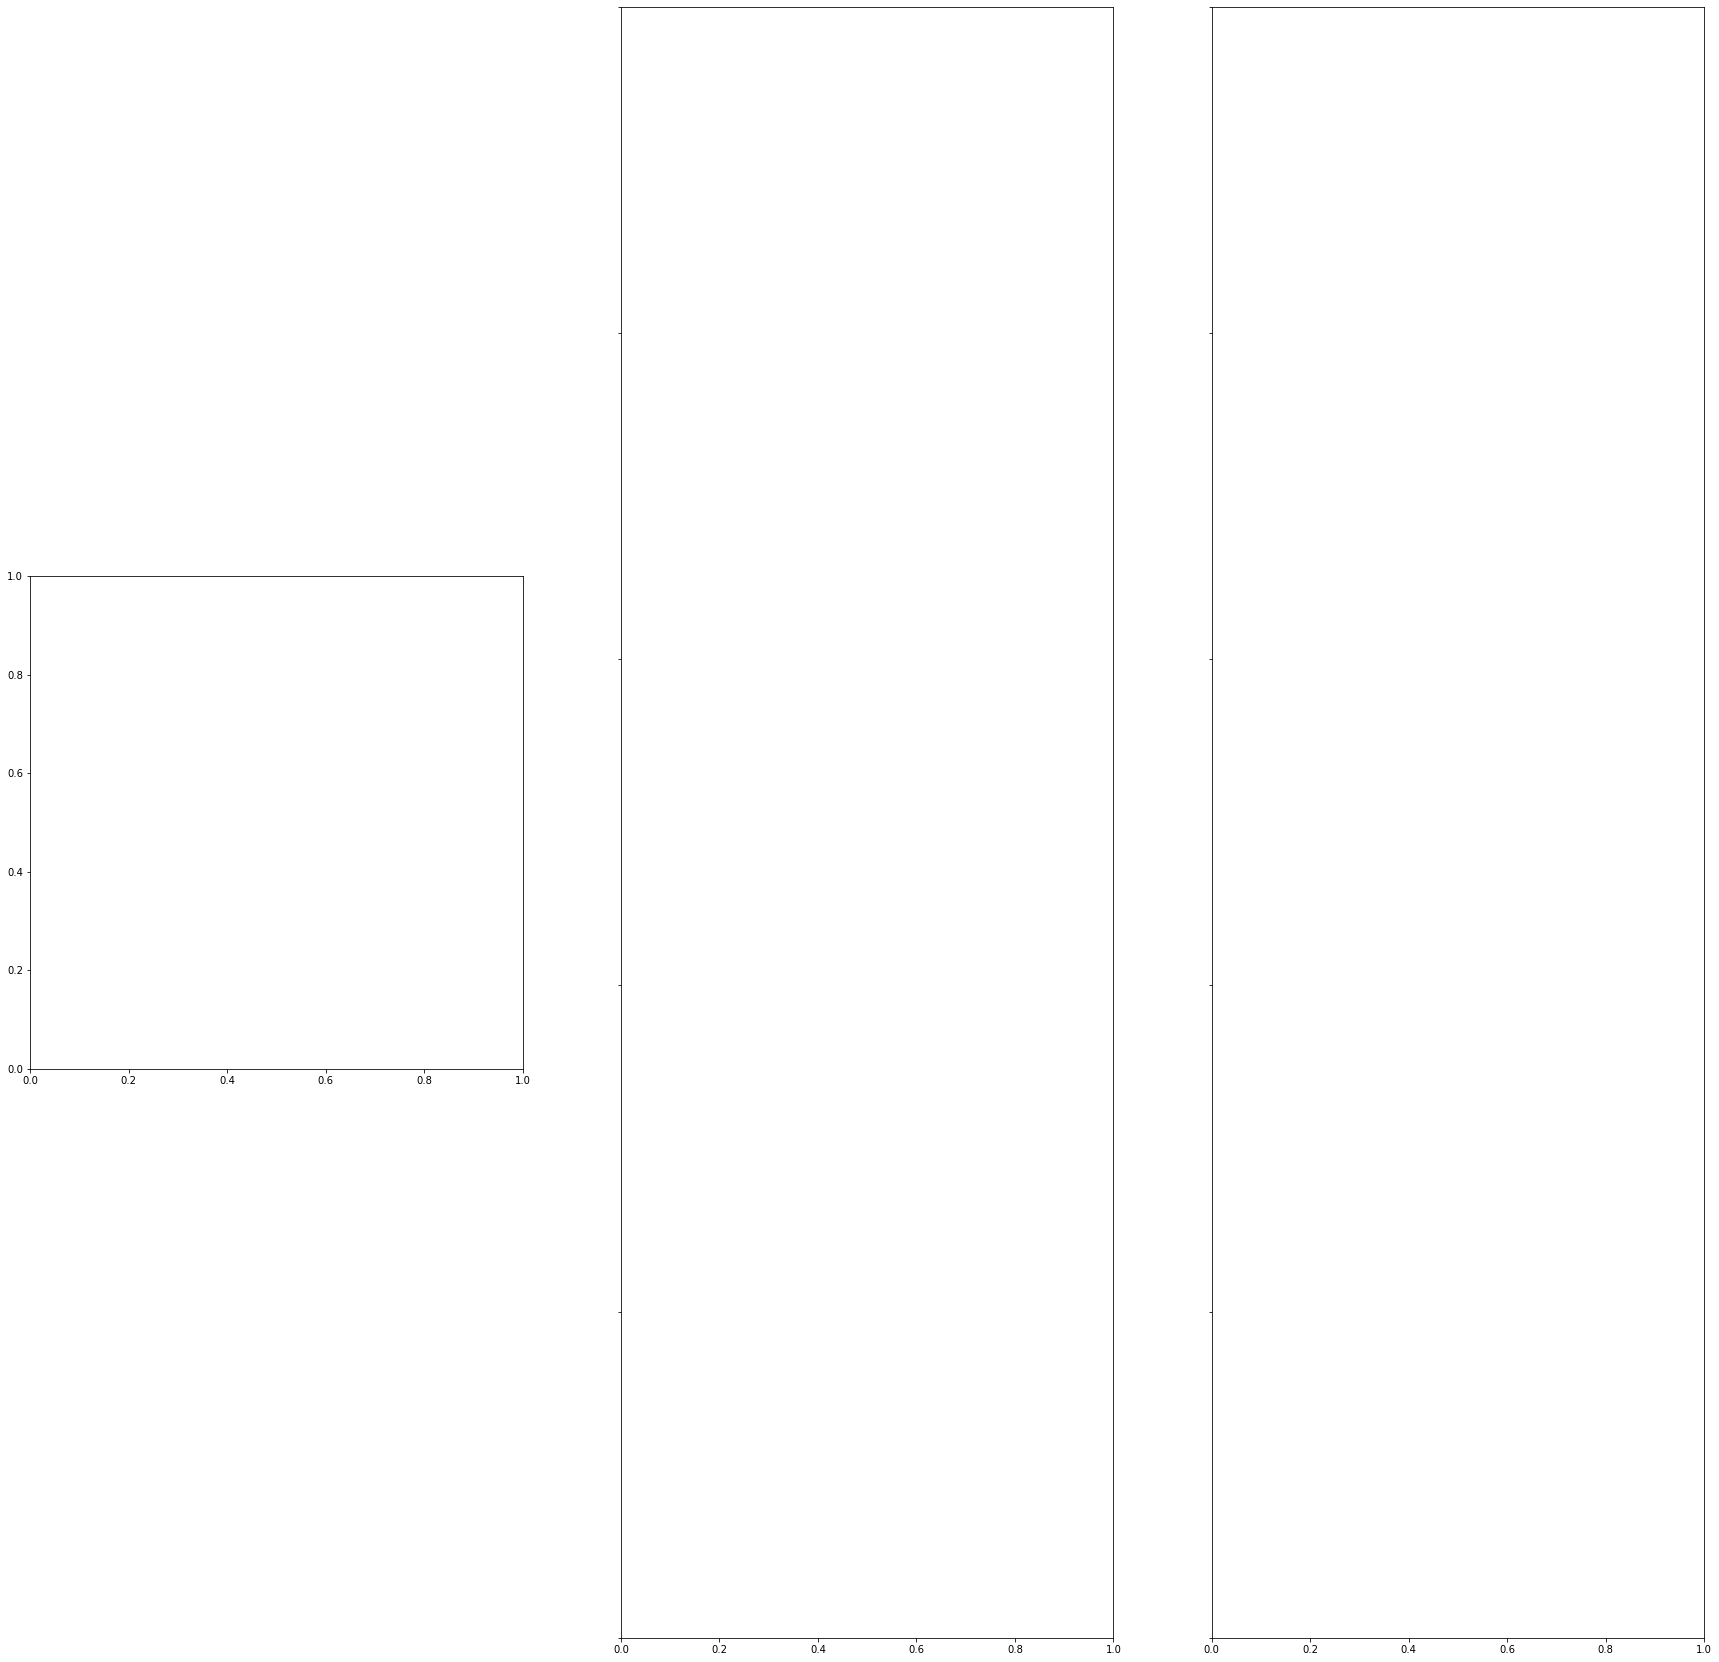

In [13]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(1,3, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(result_image)
axs[0].set_title('Result', fontsize=30)
axs[1].imshow(fixed_image)
axs[1].set_title('Fixed', fontsize=30)
axs[2].imshow(moving_image)
axs[2].set_title('Moving', fontsize=30)
plt.show()